In [148]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df1 = pd.read_csv("/home/amrita/ML_project/reddit-top-2.5-million/data/0x10c.csv")

In [149]:
df1.head(10)

,created_utc,score,domain,id,title,ups,downs,num_comments,permalink,selftext,...,subreddit_id,edited,link_flair_css_class,author_flair_css_class,is_self,name,url,distinguished,Ranking,Unnamed: 22
0,1345107919,430,self.0x10c,yb94y,The reason for slow,504,74,134,http://www.reddit.com/r/0x10c/comments/yb94y/t...,If you saw my tweet yesterday about being sing...,...,t5_2tu92,False,NaN,NaN,True,t3_yb94y,http://www.reddit.com/r/0x10c/comments/yb94y/t...,NaN,1,NaN
1,1349284077,324,youtube.com,10vto2,"Notch posted a demonstration of the game - ""Ph...",352,28,209,http://www.reddit.com/r/0x10c/comments/10vto2/...,NaN,...,t5_2tu92,False,NaN,NaN,False,t3_10vto2,http://www.youtube.com/watch?v=49mUfXxDG48,NaN,2,NaN
2,1358788919,311,i.imgur.com,16zwv4,"Hey, i froze myself so we can be together always!",379,68,5,http://www.reddit.com/r/0x10c/comments/16zwv4/...,NaN,...,t5_2tu92,False,NaN,NaN,False,t3_16zwv4,http://i.imgur.com/iD6HeVL.png,NaN,3,NaN
3,1350053607,298,youtube.com,11d8ih,New art test and dynamic lights for 0x10c,317,19,98,http://www.reddit.com/r/0x10c/comments/11d8ih/...,NaN,...,t5_2tu92,False,NaN,NaN,False,t3_11d8ih,http://www.youtube.com/watch?v=nYojT0Xgt9Y,NaN,4,NaN
4,1339213638,295,i.imgur.com,usp9b,Not being a programmer in 0x10c,333,38,34,http://www.reddit.com/r/0x10c/comments/usp9b/n...,NaN,...,t5_2tu92,False,NaN,NaN,False,t3_usp9b,http://i.imgur.com/SCaPS.gif,NaN,5,NaN
5,1359073848,289,imgur.com,1783gj,Got impatient. Made my own concept art.,321,32,47,http://www.reddit.com/r/0x10c/comments/1783gj/...,NaN,...,t5_2tu92,False,NaN,NaN,False,t3_1783gj,http://imgur.com/mzDIex1,NaN,6,NaN
6,1349368875,288,youtube.com,10xykl,My video brightness fix test video,344,56,84,http://www.reddit.com/r/0x10c/comments/10xykl/...,NaN,...,t5_2tu92,False,NaN,NaN,False,t3_10xykl,http://www.youtube.com/watch?v=v7nEsUA5JGo,NaN,7,NaN
7,1353974008,286,0x10c.com,13uapp,At Minecon one of the Mojang guys told me that...,313,27,329,http://www.reddit.com/r/0x10c/comments/13uapp/...,NaN,...,t5_2tu92,False,NaN,NaN,False,t3_13uapp,http://0x10c.com/wp-content/uploads/2012/10/DC...,NaN,8,NaN
8,1351178477,264,i.imgur.com,122hjs,0x10c's artist posted a mockup for what the ga...,284,20,139,http://www.reddit.com/r/0x10c/comments/122hjs/...,NaN,...,t5_2tu92,False,NaN,NaN,False,t3_122hjs,http://i.imgur.com/akByX.jpg,NaN,9,NaN
9,1358774132,261,i.imgur.com,16zj9b,Notch in 0x10c,289,28,40,http://www.reddit.com/r/0x10c/comments/16zj9b/...,NaN,...,t5_2tu92,False,NaN,NaN,False,t3_16zj9b,http://i.imgur.com/7gp4m2a.png,NaN,10,NaN


In [150]:
df1 = df1.drop(["Unnamed: 22","created_utc","is_self","domain", "id","title","permalink","selftext","over_18","thumbnail","subreddit_id","edited","link_flair_css_class","author_flair_css_class","name","url","distinguished","link_flair_text"],axis=1)

In [151]:
df2=df1

In [152]:
df2.head(10)

,score,ups,downs,num_comments,Ranking
0,430,504,74,134,1
1,324,352,28,209,2
2,311,379,68,5,3
3,298,317,19,98,4
4,295,333,38,34,5
5,289,321,32,47,6
6,288,344,56,84,7
7,286,313,27,329,8
8,264,284,20,139,9
9,261,289,28,40,10


In [153]:
len(df1)

999

In [154]:
df1["score"]=((df1["score"]-df1["score"].min())/(df1["score"].max()-df1["score"].min()))*100

In [155]:
df1["num_comments"]=((df1["num_comments"]-df1["num_comments"].min())/(df1["num_comments"].max()-df1["num_comments"].min()))*100

In [156]:
df1["downs"]=((df1["downs"]-df1["downs"].min())/(df1["downs"].max()-df1["downs"].min()))*100

In [157]:
df1.dtypes


score           float64
ups               int64
downs           float64
num_comments    float64
Ranking           int64
dtype: object

In [158]:
df1[['ups']] = df1[['ups']].astype('float64')


In [159]:
df1.head(5)

,score,ups,downs,num_comments,Ranking
0,100.000000,504.0,62.711864,25.093633,1
1,75.348837,352.0,23.728814,39.138577,2
2,72.325581,379.0,57.627119,0.936330,3
3,69.302326,317.0,16.101695,18.352060,4
4,68.604651,333.0,32.203390,6.367041,5


In [160]:
df1["ups"]=((df1["ups"]-df1["ups"].min())/(df1["ups"].max()-df1["ups"].min()))*100

In [161]:
dataset_ready=df1

In [162]:
dataset_ready.head(10)

,score,ups,downs,num_comments,Ranking
0,100.000000,100.000000,62.711864,25.093633,1
1,75.348837,69.781312,23.728814,39.138577,2
2,72.325581,75.149105,57.627119,0.936330,3
3,69.302326,62.823062,16.101695,18.352060,4
4,68.604651,66.003976,32.203390,6.367041,5
5,67.209302,63.618290,27.118644,8.801498,6
6,66.976744,68.190855,47.457627,15.730337,7
7,66.511628,62.027833,22.881356,61.610487,8
8,61.395349,56.262425,16.949153,26.029963,9
9,60.697674,57.256461,23.728814,7.490637,10


In [163]:
# applying algorithms

In [164]:
df1 = df1.drop(["Ranking"],axis=1)
df1.head(10)

,score,ups,downs,num_comments
0,100.000000,100.000000,62.711864,25.093633
1,75.348837,69.781312,23.728814,39.138577
2,72.325581,75.149105,57.627119,0.936330
3,69.302326,62.823062,16.101695,18.352060
4,68.604651,66.003976,32.203390,6.367041
5,67.209302,63.618290,27.118644,8.801498
6,66.976744,68.190855,47.457627,15.730337
7,66.511628,62.027833,22.881356,61.610487
8,61.395349,56.262425,16.949153,26.029963
9,60.697674,57.256461,23.728814,7.490637


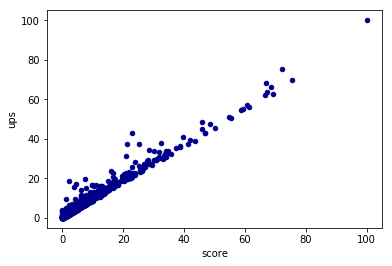

In [165]:
ax1 = df1.plot.scatter(x='score',y='ups',c='DarkBlue')

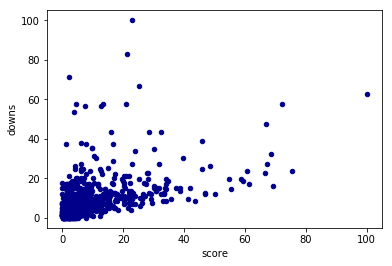

In [166]:
ax1 = df1.plot.scatter(x='score',y='downs',c='DarkBlue')

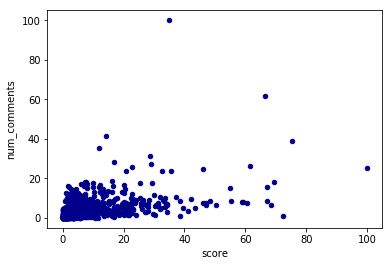

In [167]:
ax1 = df1.plot.scatter(x='score',y='num_comments',c='DarkBlue')

In [168]:
df1 = df1.rename(columns={'num_comments':'comments'})

In [169]:
df1.head(10)

,score,ups,downs,comments
0,100.000000,100.000000,62.711864,25.093633
1,75.348837,69.781312,23.728814,39.138577
2,72.325581,75.149105,57.627119,0.936330
3,69.302326,62.823062,16.101695,18.352060
4,68.604651,66.003976,32.203390,6.367041
5,67.209302,63.618290,27.118644,8.801498
6,66.976744,68.190855,47.457627,15.730337
7,66.511628,62.027833,22.881356,61.610487
8,61.395349,56.262425,16.949153,26.029963
9,60.697674,57.256461,23.728814,7.490637


In [170]:
x = df1[['ups', 'downs', 'comments']] #predictor variables
y = df1[['score']] #target variables

In [171]:
y = df1[['score']] #target variables

In [172]:
#splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(df1))

xtrain = x[:split]
ytrain = y[:split]

xtest = x[split:]
ytest = y[split:]


xtest['ups'].index[10]

709

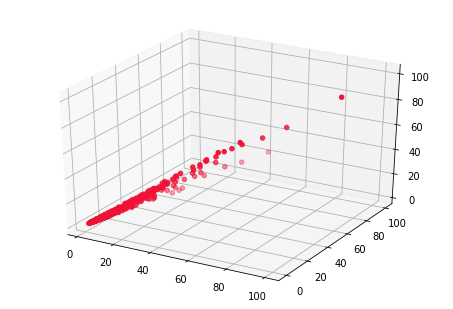

In [173]:
ups = xtrain['ups'].values
downs = xtrain['downs'].values
score = ytrain['score'].values
comments = xtrain['comments'].values

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(ups, downs, score, color='#ef1234')
plt.show()


In [174]:
m = len(ups)
x0 = np.ones(m) #array of size m filled with one's
X = np.array([x0,ups,downs,comments]).T
# Initial Coefficients
B = np.array([0, 0, 0, 0])
Y = np.array(score)
alpha = 0.0000001

In [175]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [176]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

131.0301512397762


In [177]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [178]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[0.02335316 0.7299094  0.18254577 0.17998611]
8.17332349694192


In [179]:
#score = 0.21558522 + 

In [180]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

4.043098687131423
0.8846639240250102


In [181]:
sumofsquares = 0
sumofresiduals = 0
mean_y = np.mean(Y)
for i in range(len(xtest)) :
    y_pred = newB[1] + newB[3]*xtest['ups'].index[i] + newB[0]*xtest['downs'].index[i] + newB[2]*xtest['comments'].index[i]
    sumofsquares += (ytest.index[i] - mean_y) ** 2
    sumofresiduals += (ytest.index[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)



0.614096455163454


In [182]:
 #splitting test and dataset randomly

In [183]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
x = df1[['ups', 'downs', 'comments']] #predictor variables
y = df1[['score']] #target variables
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.33, random_state=5)

In [184]:
ups = X_train['ups'].values
downs = X_train['downs'].values
score = Y_train['score'].values
comments = X_train['comments'].values

In [185]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [186]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

131.0301512397762


In [187]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    
    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

In [188]:
# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

[0.02335316 0.7299094  0.18254577 0.17998611]
8.17332349694192


In [189]:
#score = 0.21558522 + 

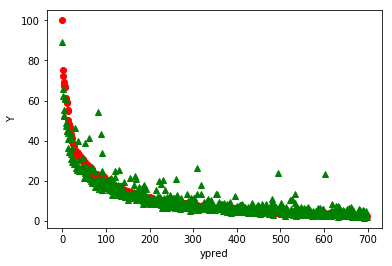

4.043098687131423
0.8846639240250102


In [190]:
# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2


Y_pred = X.dot(newB)

plt.plot(Y, 'ro', Y_pred, 'g^')
plt.ylabel('Y')
plt.xlabel('ypred')
plt.show()

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))

61.4096455163454


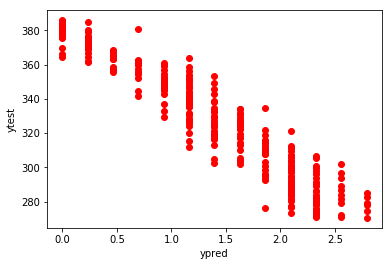

In [191]:
sumofsquares = 0
sumofresiduals = 0
ypred=[]
mean_y = np.mean(Y)
for i in range(len(xtest)) :
    y_pred = newB[1] + newB[0]*xtest['ups'].index[i] + newB[3]*xtest['downs'].index[i] + newB[2]*xtest['comments'].index[i]
    sumofsquares += (ytest.index[i] - mean_y) ** 2
    sumofresiduals += (ytest.index[i] - y_pred) **2
    ypred.append(y_pred)
    

score  = 1 - (sumofresiduals/sumofsquares)
print(score*100)
plt.plot(ytest, ypred, 'ro')
plt.ylabel('ytest')
plt.xlabel('ypred')
plt.show()

In [192]:
ups= 90
downs= 10
comments= 2
y_pred = newB[1] + newB[3]*ups + newB[2]*downs + newB[0]*comments
df = pd.read_csv("/home/amrita/ML_project/reddit-top-2.5-million/data/0x10c.csv")
df["score"]=((df["score"]-df["score"].min())/(df["score"].max()-df["score"].min()))*100
for i in range(m):
    if(int(y_pred) == int(df1['score'][i])):
        print(df1['score'][i])
        print(df['title'][i])



18.372093023255815
0x10c's 3D artist's previous works
18.6046511627907
N00B Friendly Drag and Drop 'Board Builder' Programming Concept for 0x10c + Pics


76.33329475942273


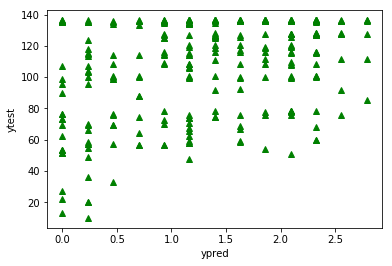

In [199]:
#RANDOM FORESTS
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
xtrain, ytrain = make_regression(n_features=3, n_informative=3,random_state=5, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=5,n_estimators=1000)
regr.fit(xtrain, ytrain)
print(regr.score(xtrain,ytrain)*100)
ypred =regr.predict(xtest)
plt.plot(ytest, ypred, 'g^')
plt.ylabel('ytest')
plt.xlabel('ypred')
plt.show()
#ups= 9 
#downs= 10
#comments= 2
#ypred=regr.predict([[ups,downs,comments]])
#print(ypred[0])
#df1 = pd.read_csv("/home/amrita/ML_project/reddit-top-2.5-million/data/0x10c.csv")
#df["score"]=((df["score"]-df["score"].min())/(df["score"].max()-df["score"].min()))*100
#for i in range(m):
    #if(int(ypred[0]) == int(df1['score'][i])):
        #print(df1['score'][i])
        #print(df['title'][i])
        







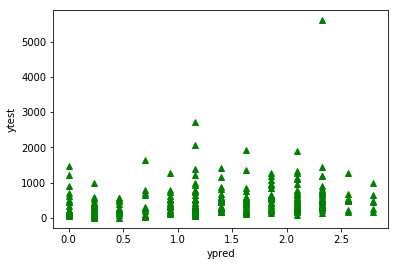

99.98971579556975


In [202]:
#RIDGE REGRESSION
from sklearn.linear_model import Ridge
import numpy as np
n_samples, n_features = 1000,3
clf = Ridge(alpha=1.0)
clf.fit(xtrain,ytrain)
Ridge(alpha=0.00001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True,random_state=5,solver='auto',tol=0.001)
clf.score(xtrain,ytrain)
ypred =clf.predict(xtest)
plt.plot(ytest, ypred, 'g^')
plt.ylabel('ytest')
plt.xlabel('ypred')
plt.show()
print(clf.score(xtrain,ytrain)*100)
